# Lab | Data Cleaning and Formatting

In this lab, we will be working with the customer data from an insurance company, which can be found in the CSV file located at the following link: https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv


# Challenge 1: Data Cleaning and Formatting

## Exercise 1: Cleaning Column Names

To ensure consistency and ease of use, standardize the column names of the dataframe. Start by taking a first look at the dataframe and identifying any column names that need to be modified. Use appropriate naming conventions and make sure that column names are descriptive and informative.

*Hint*:
- *Column names should be in lower case*
- *White spaces in column names should be replaced by `_`*
- *`st` could be replaced for `state`*

In [1]:
import pandas as pd
import numpy as np
df= pd.read_csv('https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv')
df.head()


,Customer,ST,GENDER,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323


In [2]:
cols=[] 
for colname in df.columns:
    cols.append(colname.lower())
df.columns = cols
df.head()


,customer,st,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323


In [3]:
df.columns=df.columns.str.replace(' ','_')
#df['state']=df.column.str.replace('st','state')
df.head()

,customer,st,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323


In [4]:
df.rename(columns={'st':'state'},inplace=True) 
df.head()

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323


## Exercise 2: Cleaning invalid Values

The dataset contains columns with inconsistent and incorrect values that could affect the accuracy of our analysis. Therefore, we need to clean these columns to ensure that they only contain valid data.

Note that this exercise will focus only on cleaning inconsistent values and will not involve handling null values (NaN or None).

*Hint*:
- *Gender column contains various inconsistent values such as "F", "M", "Femal", "Male", "female", which need to be standardized, for example, to "M" and "F".*
- *State abbreviations be can replaced with its full name, for example "AZ": "Arizona", "Cali": "California", "WA": "Washington"*
- *In education, "Bachelors" could be replaced by "Bachelor"*
- *In Customer Lifetime Value, delete the `%` character*
- *In vehicle class, "Sports Car", "Luxury SUV" and "Luxury Car" could be replaced by "Luxury"*

In [5]:
df["gender"].value_counts()

gender
F         457
M         413
Male       39
female     28
Femal      17
Name: count, dtype: int64

In [6]:
def cleangender(x):
    F_target=['Femal', 'female']
    M_target=['Male']
    if x in M_target:
        return 'M'
    elif x in F_target:
        return 'F'
    else:
        return x

df['gender'] = list(map(cleangender, df['gender']))
df['gender'].unique()


array([nan, 'F', 'M'], dtype=object)

In [7]:
df['gender'].value_counts()


gender
F    502
M    452
Name: count, dtype: int64

In [8]:
state_mapping = {
    'AZ': 'Arizona',
    'Cali': 'California',
    'WA': 'Washington',
}
df['state'] = df['state'].replace(state_mapping)
df["state"].value_counts()

state
California    331
Oregon        320
Arizona       211
Washington    111
Nevada         98
Name: count, dtype: int64

In [9]:
df['education']=df['education'].str.replace('Bachelors', 'Bachelor')
df["education"].value_counts()

education
Bachelor                331
College                 313
High School or Below    296
Master                   94
Doctor                   37
Name: count, dtype: int64

## Exercise 3: Formatting data types

The data types of many columns in the dataset appear to be incorrect. This could impact the accuracy of our analysis. To ensure accurate analysis, we need to correct the data types of these columns. Please update the data types of the columns as appropriate.

It is important to note that this exercise does not involve handling null values (NaN or None).

*Hint*:
- *Customer lifetime value should be numeric*
- *Number of open complaints has an incorrect format. Look at the different values it takes with `unique()` and take the middle value. As an example, 1/5/00 should be 5. Number of open complaints is a string - remember you can use `split()` to deal with it and take the number you need. Finally, since it should be numeric, cast the column to be in its proper type.*

In [10]:
df.dtypes

customer                      object
state                         object
gender                        object
education                     object
customer_lifetime_value       object
income                       float64
monthly_premium_auto         float64
number_of_open_complaints     object
policy_type                   object
vehicle_class                 object
total_claim_amount           float64
dtype: object

In [11]:
df

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
4003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
import numpy as np

In [13]:
df['customer_lifetime_value']=df['customer_lifetime_value'].str.replace('%'," ")
df['customer_lifetime_value']=pd.to_numeric(df["customer_lifetime_value"], errors="coerce")/100
df['customer_lifetime_value']



0              NaN
1        6979.5359
2       12887.4317
3        7645.8618
4        5363.0765
           ...    
4003           NaN
4004           NaN
4005           NaN
4006           NaN
4007           NaN
Name: customer_lifetime_value, Length: 4008, dtype: float64

In [14]:
df['number_of_open_complaints']=df['number_of_open_complaints'].str.split(pat="/").str.get(1)


In [15]:
df['number_of_open_complaints']=pd.to_numeric(df["number_of_open_complaints"], errors="coerce")


In [16]:
df.head()

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,0.0,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,6979.5359,0.0,94.0,0.0,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,12887.4317,48767.0,108.0,0.0,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,7645.8618,0.0,106.0,0.0,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,5363.0765,36357.0,68.0,0.0,Personal Auto,Four-Door Car,17.269323


In [17]:
df.head()

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,0.0,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,6979.5359,0.0,94.0,0.0,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,12887.4317,48767.0,108.0,0.0,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,7645.8618,0.0,106.0,0.0,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,5363.0765,36357.0,68.0,0.0,Personal Auto,Four-Door Car,17.269323


In [18]:
df.dtypes

customer                      object
state                         object
gender                        object
education                     object
customer_lifetime_value      float64
income                       float64
monthly_premium_auto         float64
number_of_open_complaints    float64
policy_type                   object
vehicle_class                 object
total_claim_amount           float64
dtype: object

## Exercise 4: Dealing with Null values

Identify any columns with null or missing values. Identify how many null values each column has. You can use the `isnull()` function in pandas to find columns with null values.

Decide on a strategy for handling the null values. There are several options, including:

- Drop the rows or columns with null values
- Fill the null values with a specific value (such as the column mean or median for numerical variables, and mode for categorical variables)
- Fill the null values with the previous or next value in the column
- Fill the null values based on a more complex algorithm or model (note: we haven't covered this yet)

Implement your chosen strategy to handle the null values. You can use the `fillna()` function in pandas to fill null values or `dropna()` function to drop null values.

Verify that your strategy has successfully handled the null values. You can use the `isnull()` function again to check if there are still null values in the dataset.

Remember to document your process and explain your reasoning for choosing a particular strategy for handling null values.

After formatting data types, as a last step, convert all the numeric variables to integers.

In [19]:
df.shape

(4008, 11)

In [20]:
df.isnull().sum()

customer                     2937
state                        2937
gender                       3054
education                    2937
customer_lifetime_value      2940
income                       2937
monthly_premium_auto         2937
number_of_open_complaints    2937
policy_type                  2937
vehicle_class                2937
total_claim_amount           2937
dtype: int64

In [21]:
df=df.dropna()

In [22]:
df.isnull().sum()

customer                     0
state                        0
gender                       0
education                    0
customer_lifetime_value      0
income                       0
monthly_premium_auto         0
number_of_open_complaints    0
policy_type                  0
vehicle_class                0
total_claim_amount           0
dtype: int64

In [23]:
df.shape

(952, 11)

## Exercise 5: Dealing with duplicates

Use the `.duplicated()` method to identify any duplicate rows in the dataframe.

Decide on a strategy for handling the duplicates. Options include:
- Dropping all duplicate rows
- Keeping only the first occurrence of each duplicated row
- Keeping only the last occurrence of each duplicated row
- Dropping duplicates based on a subset of columns
- Dropping duplicates based on a specific column

Implement your chosen strategy using the `drop_duplicates()` function.

Verify that your strategy has successfully handled the duplicates by checking for duplicates again using `.duplicated()`.

Remember to document your process and explain your reasoning for choosing a particular strategy for handling duplicates.

Save the cleaned dataset to a new CSV file.

*Hint*: *after dropping duplicates, reset the index to ensure consistency*.

In [24]:
df.duplicated().sum()

0

In [25]:
df = df.drop_duplicates(keep='last')


# Bonus: Challenge 2: creating functions on a separate `py` file

Put all the data cleaning and formatting steps into functions, and create a main function that performs all the cleaning and formatting.

Write these functions in separate .py file(s). By putting these steps into functions, we can make the code more modular and easier to maintain.

*Hint: autoreload module is a utility module in Python that allows you to automatically reload modules in the current session when changes are made to the source code. This can be useful in situations where you are actively developing code and want to see the effects of changes you make without having to constantly restart the Python interpreter or Jupyter Notebook kernel.*

In [26]:
# Your code here

# Bonus: Challenge 3: Analyzing Clean and Formated Data

You have been tasked with analyzing the data to identify potential areas for improving customer retention and profitability. Your goal is to identify customers with a high policy claim amount and a low customer lifetime value.

In the Pandas Lab, we only looked at high policy claim amounts because we couldn't look into low customer lifetime values. If we had tried to work with that column, we wouldn't have been able to because customer lifetime value wasn't clean and in its proper format. So after cleaning and formatting the data, let's get some more interesting insights!

Instructions:

- Review the statistics again for total claim amount and customer lifetime value to gain an understanding of the data.
- To identify potential areas for improving customer retention and profitability, we want to focus on customers with a high policy claim amount and a low customer lifetime value. Consider customers with a high policy claim amount to be those in the top 25% of the total claim amount, and clients with a low customer lifetime value to be those in the bottom 25% of the customer lifetime value. Create a pandas DataFrame object that contains information about customers with a policy claim amount greater than the 75th percentile and a customer lifetime value in the bottom 25th percentile.
- Use DataFrame methods to calculate summary statistics about the high policy claim amount and low customer lifetime value data. To do so, select both columns of the dataframe simultaneously and pass it to the `.describe()` method. This will give you descriptive statistics, such as mean, median, standard deviation, minimum and maximum values for both columns at the same time, allowing you to compare and analyze their characteristics.

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
# Show DataFrame info.

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 952 entries, 1 to 1070
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer                   952 non-null    object 
 1   state                      952 non-null    object 
 2   gender                     952 non-null    object 
 3   education                  952 non-null    object 
 4   customer_lifetime_value    952 non-null    float64
 5   income                     952 non-null    float64
 6   monthly_premium_auto       952 non-null    float64
 7   number_of_open_complaints  952 non-null    float64
 8   policy_type                952 non-null    object 
 9   vehicle_class              952 non-null    object 
 10  total_claim_amount         952 non-null    float64
dtypes: float64(5), object(6)
memory usage: 89.2+ KB


In [40]:
#Describe DataFrame.

df.describe().T


,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,952.0,7942.012863,6258.791614,2004.350700,4117.835800,5885.7453,9037.50915,44795.469400
income,952.0,39557.350840,30744.561851,0.000000,13087.750000,36632.0000,65085.50000,99960.000000
monthly_premium_auto,952.0,205.231092,1697.752504,61.000000,68.000000,83.0000,110.00000,35354.000000
number_of_open_complaints,952.0,0.378151,0.872446,0.000000,0.000000,0.0000,0.00000,5.000000
total_claim_amount,952.0,404.999156,299.238726,0.382107,196.724587,350.4000,534.00000,2893.239678


In [31]:
y = df['total_claim_amount']
X = df[['customer_lifetime_value',"income","monthly_premium_auto","number_of_open_complaints"]]

In [32]:
X

,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints
1,6979.5359,0.0,94.0,0.0
2,12887.4317,48767.0,108.0,0.0
3,7645.8618,0.0,106.0,0.0
4,5363.0765,36357.0,68.0,0.0
5,8256.2978,62902.0,69.0,0.0
...,...,...,...,...
1066,3059.5503,38644.0,78.0,1.0
1067,20314.9976,63209.0,102.0,2.0
1068,3239.1247,16061.0,88.0,0.0
1069,4626.8011,79487.0,114.0,0.0


<Axes: xlabel='gender', ylabel='count'>

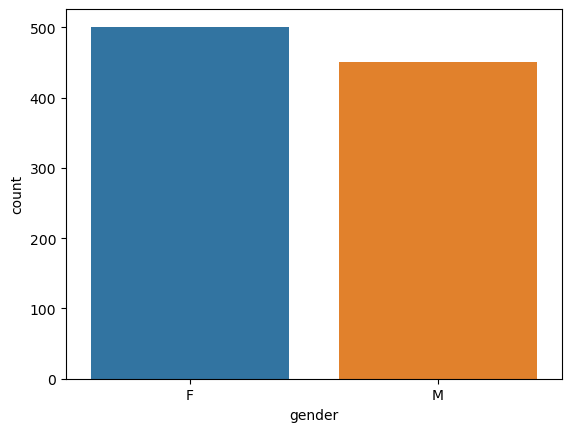

In [41]:
#Show a plot of the Gender breakdown.
sns.countplot(x='gender', data=df)

In [42]:
# What insights can you establish from these plots?
#There are more Female clients than Male clients

<Axes: xlabel='state', ylabel='income'>

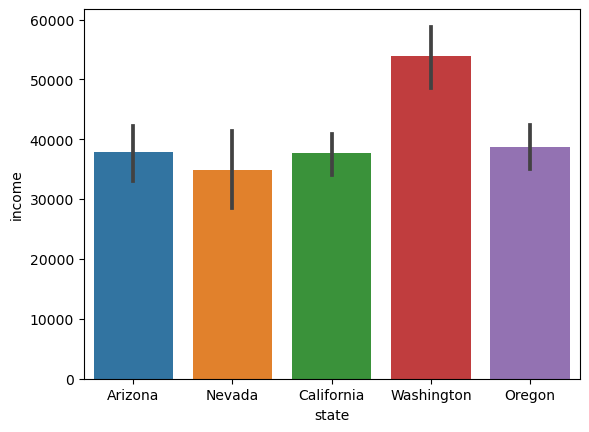

In [43]:
#Show a plot of Income by State.
sns.barplot(y='income', x='state', data=df)

In [44]:
#What insights can you establish from these plots?
#The clients in Washington State have the highest income averages

<Axes: xlabel='policy_type', ylabel='total_claim_amount'>

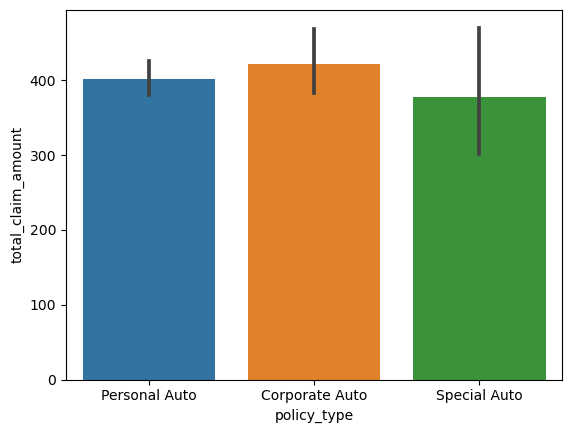

In [45]:
#Show a plot of the Policy Type by the Total Claim Amount.
sns.barplot(x='policy_type', y='total_claim_amount', data=df)

In [46]:
#What insights can you establish from these plots?
#The Corporate policies have the highest average claim amounts, 
#but there is little difference with Personal policies

[None, None, None, None, None, None, None, None, None, None]

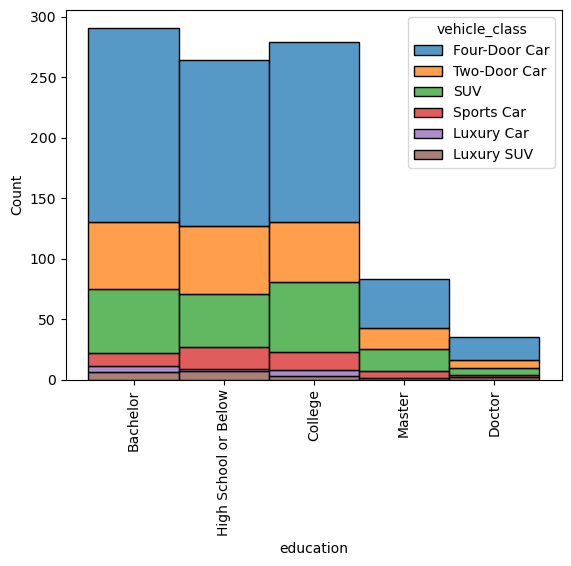

In [48]:
#Show a plot of the Education by Vehicle Class.
g = sns.histplot(x="education", hue="vehicle_class", data=df, stat="count", multiple="stack")
plt.setp(g.get_xticklabels(), rotation=90)

In [49]:
#What insights can you establish from these plots?
#The most luxury cars are insured for people with only a high school or below education level!

# Round 4


In [50]:
df.dtypes


customer                      object
state                         object
gender                        object
education                     object
customer_lifetime_value      float64
income                       float64
monthly_premium_auto         float64
number_of_open_complaints    float64
policy_type                   object
vehicle_class                 object
total_claim_amount           float64
dtype: object

In [51]:
categorical = df.select_dtypes(include=object)
numerical = df.select_dtypes(include=np.number)

C:\Users\Alex\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


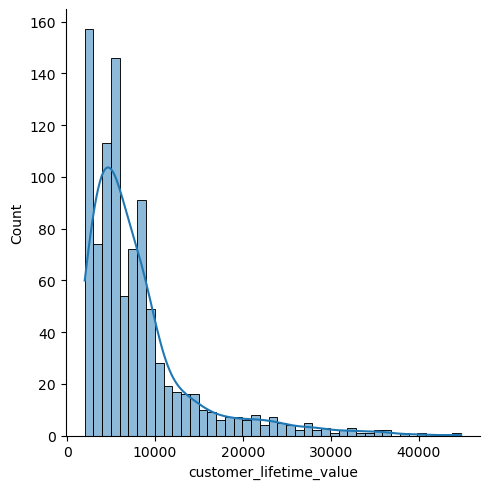

C:\Users\Alex\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


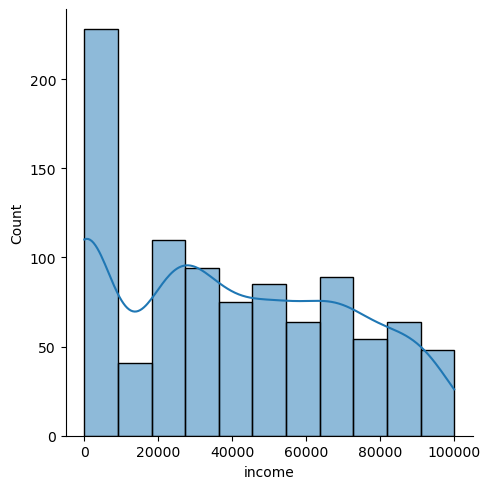

C:\Users\Alex\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


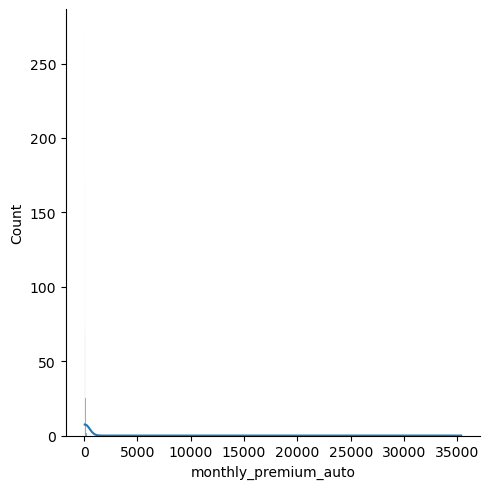

C:\Users\Alex\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


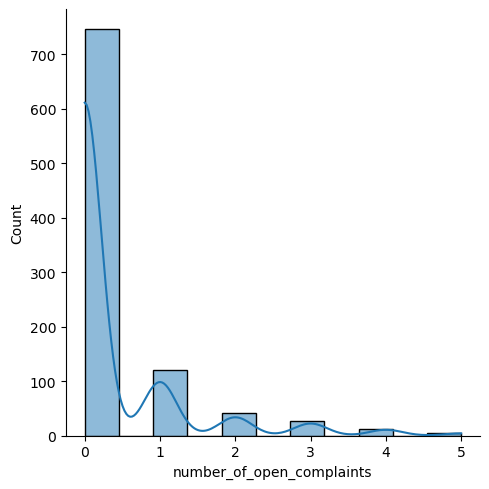

C:\Users\Alex\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


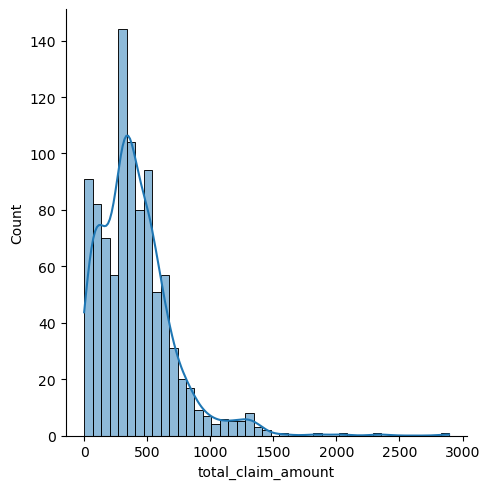

In [52]:
#Use seaborn library to construct distribution plots for the numerical variables
for column in numerical.columns:
    sns.displot(numerical[column],kde=True)
    plt.show()

<Axes: xlabel='monthly_premium_auto', ylabel='count'>

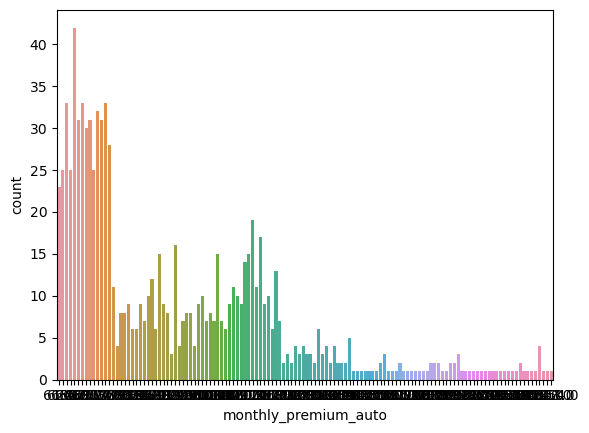

In [53]:
sns.countplot(data= numerical,x='monthly_premium_auto')


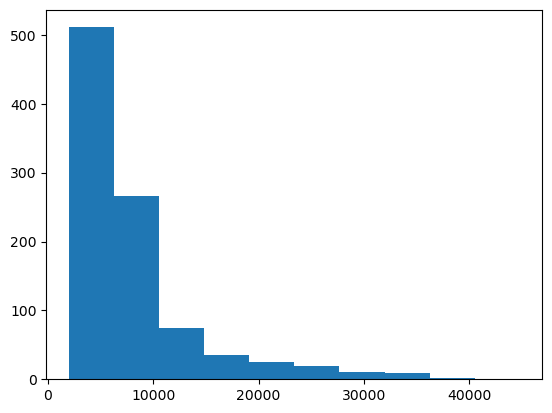

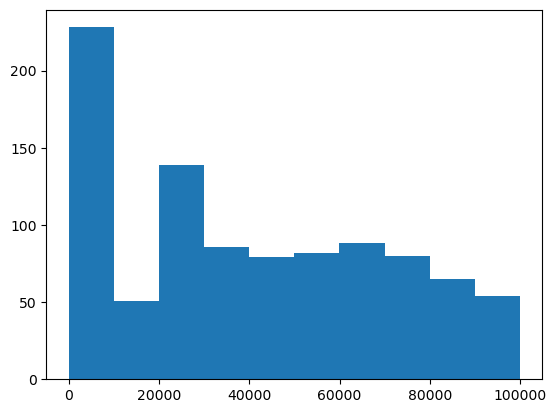

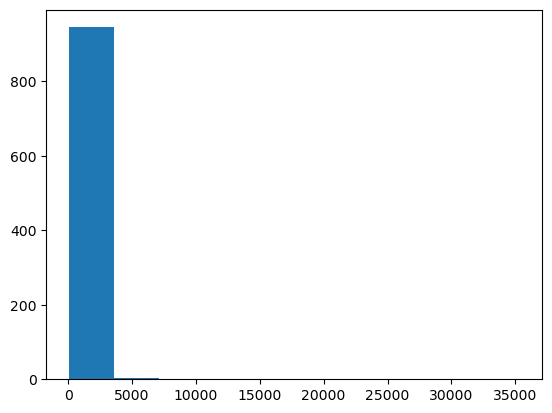

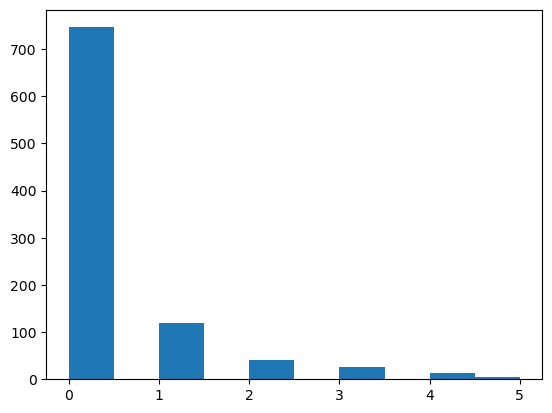

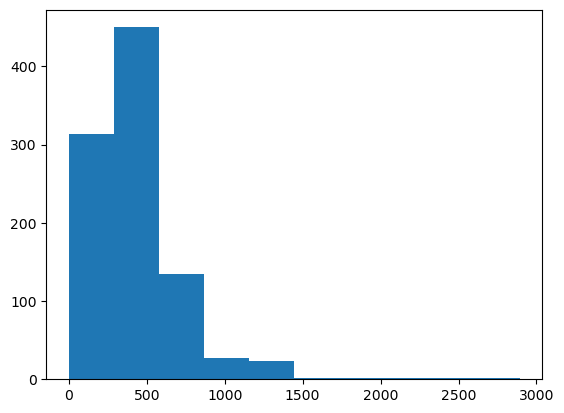

In [54]:
#Use Matplotlib to construct histograms
fig, ax = plt.subplots()
for column in numerical.columns:
    plt.hist(numerical[column])
    plt.show()


In [55]:
#For the numerical variables, check the multicollinearity between the features. 
#Please note that we will use the column total_claim_amount later as the target variable.

correlations = numerical.corr()
correlations

,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,total_claim_amount
customer_lifetime_value,1.000000,0.030614,0.004180,-0.029041,0.139519
income,0.030614,1.000000,0.051882,-0.008396,-0.366088
monthly_premium_auto,0.004180,0.051882,1.000000,0.028586,-0.041990
number_of_open_complaints,-0.029041,-0.008396,0.028586,1.000000,0.015595
total_claim_amount,0.139519,-0.366088,-0.041990,0.015595,1.000000


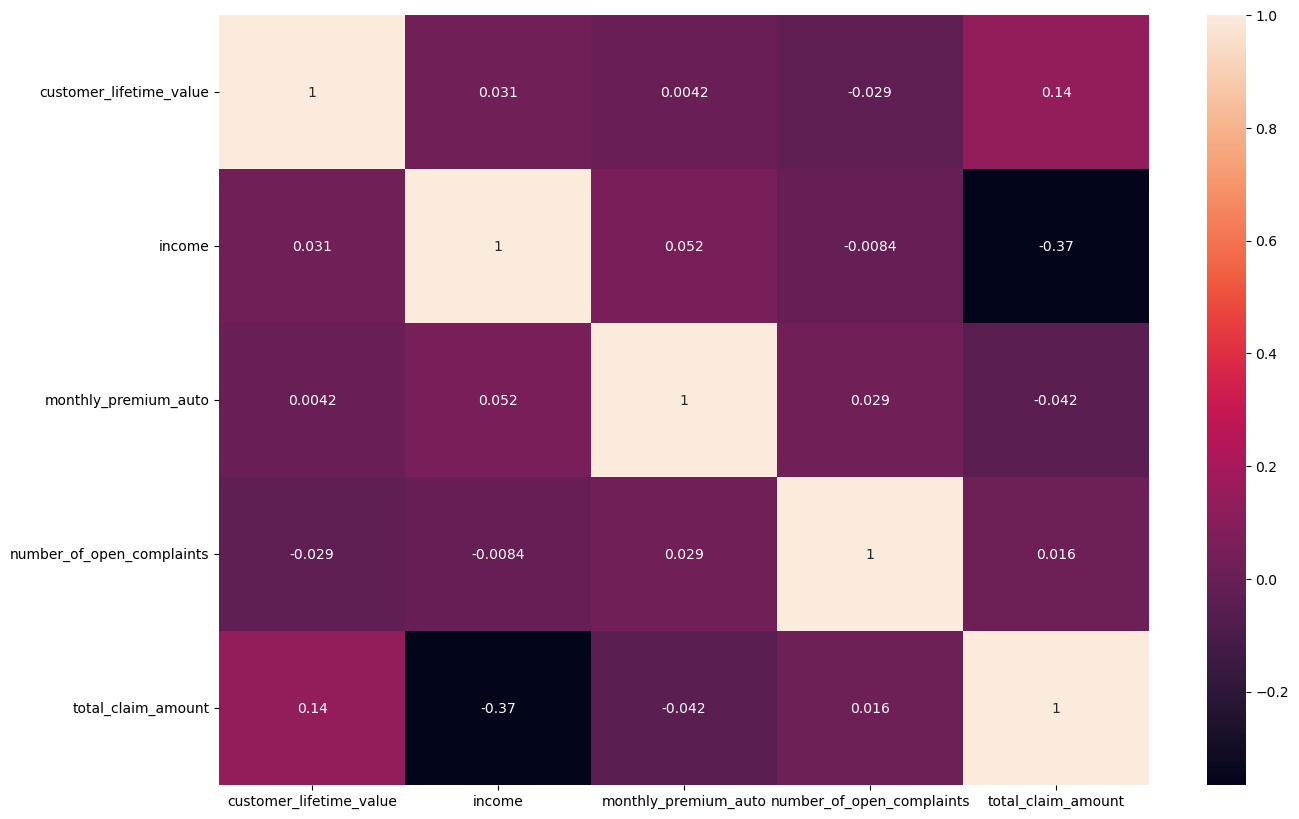

In [56]:
fig, ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(numerical.corr(), annot=True)
plt.show()

In [57]:
# There doesn't seem to be any Mulicolliniarity


# Round 5


# Processing for the X y split
# X=features y=target

In [59]:
X=df.drop('total_claim_amount', axis=1)     
y=df['total_claim_amount']

# Drop some useless columns


In [60]:
X=X.drop(columns=['customer'],axis=1)


# Again separating numerical and categorical for X-features


In [61]:
X_num1 = X.select_dtypes(np.number)
X_cat1 = X.select_dtypes(object)

In [62]:
X_num1.shape


(952, 4)

In [63]:
# this code does the same thing in a different way
X_num=X._get_numeric_data()
X_cat=X.drop(columns=X_num.columns)

print (X.shape, X_num.shape, X_cat.shape)  # check shape

(952, 9) (952, 4) (952, 5)


# Take a look at the numerical data


In [64]:
X_num.describe()


,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints
count,952.000000,952.000000,952.000000,952.000000
mean,7942.012863,39557.350840,205.231092,0.378151
std,6258.791614,30744.561851,1697.752504,0.872446
min,2004.350700,0.000000,61.000000,0.000000
25%,4117.835800,13087.750000,68.000000,0.000000
50%,5885.745300,36632.000000,83.000000,0.000000
75%,9037.509150,65085.500000,110.000000,0.000000
max,44795.469400,99960.000000,35354.000000,5.000000


# Import Libraries


In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Scaling using MinMax


In [66]:
# good for counts or if all data are positive numbers
transformer = MinMaxScaler().fit(X_num)
X_norm = transformer.transform(X_num)
print(X_norm.shape)
X_num_scale = pd.DataFrame(X_norm, columns=X_num.columns)
X_num_scale.head()

(952, 4)


,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints
0,0.116267,0.000000,0.000935,0.0
1,0.254330,0.487865,0.001332,0.0
2,0.131838,0.000000,0.001275,0.0
3,0.078491,0.363715,0.000198,0.0
4,0.146104,0.629272,0.000227,0.0


# Round 6


# One hot encode the categorical data


In [67]:
# import the library
from sklearn.preprocessing import OneHotEncoder

In [69]:
# Create encoder to be used on new data later.

encoder = OneHotEncoder(drop='first').fit(X_cat)

cols = encoder.get_feature_names_out(input_features=X_cat.columns)

X_cat_encode = pd.DataFrame(encoder.transform(X_cat).toarray(),columns=cols)

X_cat_encode.head()

,state_California,state_Nevada,state_Oregon,state_Washington,gender_M,education_College,education_Doctor,education_High School or Below,education_Master,policy_type_Personal Auto,policy_type_Special Auto,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


# concat numerical and categorical transformations for features


In [70]:
X=pd.concat([X_num_scale, X_cat_encode], axis=1) 
X.describe()

,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,state_California,state_Nevada,state_Oregon,state_Washington,gender_M,education_College,education_Doctor,education_High School or Below,education_Master,policy_type_Personal Auto,policy_type_Special Auto,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car
count,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000
mean,0.138759,0.395732,0.004087,0.075630,0.307773,0.093487,0.289916,0.111345,0.473739,0.293067,0.036765,0.277311,0.087185,0.723739,0.054622,0.013655,0.018908,0.188025,0.054622,0.193277
std,0.146264,0.307569,0.048105,0.174489,0.461815,0.291267,0.453962,0.314724,0.499572,0.455408,0.188283,0.447907,0.282254,0.447382,0.227360,0.116117,0.136270,0.390938,0.227360,0.395076
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.049391,0.130930,0.000198,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.090706,0.366467,0.000623,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.164360,0.651115,0.001388,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Train Test Split


In [71]:
# import library
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test=tts(X, y, test_size=.2)

In [72]:
X_train

,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,state_California,state_Nevada,state_Oregon,state_Washington,gender_M,education_College,education_Doctor,education_High School or Below,education_Master,policy_type_Personal Auto,policy_type_Special Auto,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car
510,0.174432,0.000000,0.000765,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
606,0.152977,0.217417,0.000340,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
106,0.102005,0.345118,0.000623,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
878,0.015449,0.522869,0.000198,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
731,0.130288,0.339196,0.000085,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,0.065683,0.254082,0.000085,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
89,0.021514,0.644848,0.000312,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
322,0.077105,0.000000,0.000425,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
29,0.138451,0.000000,0.000312,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
y_train


628    633.600000
724    525.600000
223    398.400000
997    141.922839
849    401.592109
          ...    
445    307.200000
206    240.259479
439    395.341110
146    345.600000
488    331.200000
Name: total_claim_amount, Length: 761, dtype: float64

# Train and run model


In [74]:
#import library
from sklearn.linear_model import LinearRegression as linreg

lm = linreg()    # model
lm.fit(X_train, y_train)   # model training
y_pred = lm.predict(X_test)   # model prediction

# Validation R2 scores


In [75]:
print ('train R2: {} -- test R2: {}'.format(lm.score(X_train, y_train),
                                            lm.score(X_test, y_test)))

train R2: 0.48786479057699017 -- test R2: 0.4997805975827191


# Mean Squared Error


In [76]:
from sklearn.metrics import mean_squared_error as mse


train_mse=mse(lm.predict(X_train), y_train)
test_mse=mse(y_pred, y_test)

print ('train MSE: {} -- test MSE: {}'.format(train_mse, test_mse))

train MSE: 44546.64668257586 -- test MSE: 49316.19139418131


# Root Mean Squared Error


In [77]:
print ('train RMSE: {} -- test RMSE: {}'.format(train_mse**.5, test_mse**.5))


train RMSE: 211.06076537948937 -- test RMSE: 222.07249130448668


# Mean Absolute Error


In [78]:
from sklearn.metrics import mean_absolute_error as mae

train_mae=mae(lm.predict(X_train), y_train)
test_mae=mae(y_pred, y_test)

print ('train MAE: {} -- test MAE: {}'.format(train_mae, test_mae))

train MAE: 155.67861616844945 -- test MAE: 161.52831196568232


# Try to improve the model / Using Standard Scaler instead of MinMax



In [80]:
# good for measurements or if some of your values are negative.
transformer = StandardScaler().fit(X_num)
X_standard = transformer.transform(X_num)
print(X_standard.shape)
X_num_standard = pd.DataFrame(X_standard, columns=X_num.columns)
X_num_standard.head()

(952, 4)


,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints
0,-0.153861,-1.287322,-0.065551,-0.433666
1,0.790571,0.299711,-0.057301,-0.433666
2,-0.047342,-1.287322,-0.058479,-0.433666
3,-0.412267,-0.104150,-0.080874,-0.433666
4,0.050241,0.759709,-0.080284,-0.433666


In [81]:
X2=pd.concat([X_num_standard, X_cat_encode], axis=1) 
X2.head()

,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,state_California,state_Nevada,state_Oregon,state_Washington,gender_M,education_College,education_Doctor,education_High School or Below,education_Master,policy_type_Personal Auto,policy_type_Special Auto,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car
0,-0.153861,-1.287322,-0.065551,-0.433666,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.790571,0.299711,-0.057301,-0.433666,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.047342,-1.287322,-0.058479,-0.433666,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.412267,-0.104150,-0.080874,-0.433666,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.050241,0.759709,-0.080284,-0.433666,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [82]:
X_train, X_test, y_train, y_test=tts(X2, y, test_size=.2) 

#new test train split with new X2 value of Standard Scaler.

In [83]:
lm=linreg()    # model
lm.fit(X_train, y_train)   # model training
y_pred_lm=lm.predict(X_test)   # predictions

In [84]:
print ('train R2: {} -- test R2: {}'.format(lm.score(X_train, y_train),
                                            lm.score(X_test, y_test)))

train R2: 0.5034494656088693 -- test R2: 0.44933433225708774


# Changing the test size


In [85]:
X_train, X_test, y_train, y_test=tts(X2, y, test_size=.1)


In [86]:
lm=linreg()    # model
lm.fit(X_train, y_train)   # model training
y_pred_lm=lm.predict(X_test)   # predictions

In [87]:
print ('train R2: {} -- test R2: {}'.format(lm.score(X_train, y_train),
                                            lm.score(X_test, y_test)))

train R2: 0.5099196396559091 -- test R2: 0.2561763277435918


In [88]:
train_mse=mse(lm.predict(X_train), y_train)
test_mse=mse(y_pred_lm, y_test)

print ('train MSE: {} -- test MSE: {}'.format(train_mse, test_mse))

train MSE: 45641.83345856035 -- test MSE: 40771.86601866938


In [89]:
print ('train RMSE: {} -- test RMSE: {}'.format(train_mse**.5, test_mse**.5))


train RMSE: 213.63949414506754 -- test RMSE: 201.92044477632615


In [90]:
train_mae=mae(lm.predict(X_train), y_train)
test_mae=mae(y_pred_lm, y_test)

print ('train MAE: {} -- test MAE: {}'.format(train_mae, test_mae))

train MAE: 156.29222809042525 -- test MAE: 150.72265497029903


In [91]:
compare_TCA = pd.DataFrame({'Actual':y_test, 'Predicted': y_pred_lm})
compare_TCA

,Actual,Predicted
547,655.413330,192.869416
446,633.600000,494.187899
346,340.800000,407.692430
789,355.200000,228.608636
1051,64.598216,512.877268
...,...,...
812,141.799422,150.083626
748,56.603330,278.650438
462,326.400000,502.880391
151,57.562324,138.926371


In [92]:
compare_TCA['Difference']= compare_TCA['Actual']- compare_TCA['Predicted']


In [93]:
compare_TCA


,Actual,Predicted,Difference
547,655.413330,192.869416,462.543914
446,633.600000,494.187899,139.412101
346,340.800000,407.692430,-66.892430
789,355.200000,228.608636,126.591364
1051,64.598216,512.877268,-448.279052
...,...,...,...
812,141.799422,150.083626,-8.284204
748,56.603330,278.650438,-222.047108
462,326.400000,502.880391,-176.480391
151,57.562324,138.926371,-81.364047
